### Working with Real Data and a Real Cost Function
#### Mean Squared Error : A Cost Function For Regression Problems
### $$RSS = \sum_{i=1}^{n} \big(y^ {(i)} - h_\theta x^{(i)} \big)^2  $$
<!--easy alrernate way to write : $$ RSS = \sum_{i=1}^n (y^i) - h_\theta x^i)^2 $$    -->
### $$MSE = \frac 1 n \sum_{i=1}^{n} \big(y^ {(i)} - h_\theta x^{(i)} \big)^2  $$
### $$MSE = \frac 1 n \sum_{i=1}^{n} \big(y - \hat{y} \big)^2  $$

In [93]:
#make sample data
import numpy as np
x_5 = np.array([0.1,1.2,2.4,3.2,4.1,5.7,6.5]).reshape(7,1)
y_5 = np.array([[1.7,2.4,3.5,3.0,6.1,9.4,8.2]]).transpose()
print(x_5.shape, y_5.shape)

(7, 1) (7, 1)


In [94]:
#quick linear regression
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_5,y_5)
print(regr.intercept_[0],regr.coef_[0][0])


0.8475351486029545 1.2227264637835913


### Plotting it

0.8785549225502158

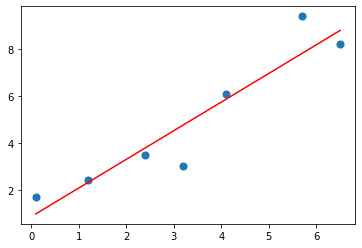

In [95]:
from matplotlib import pyplot as plt
plt.scatter(x_5,y_5,s=50)
plt.plot(x_5,regr.predict(x_5),color="red")
regr.score(x_5,y_5)

### Manually Calculating Mean Squared Error

In [96]:
#implementing the MSE. y_5 are actual values, y_hat is predicted val from regression
# y_hat is the estimated value of y, so y = intercept + coff*x values
y_hat = regr.intercept_[0] + regr.coef_[0][0] * x_5
print(y_hat)
print(y_5)
# def mse(y,y_hat):
#     diff = (y - y_hat)**2
#     diff = sum(diff)
#     return diff/y.size

#Using numpy avergae

def mse(y,y_hat):
    return np.average((y-y_hat)**2,axis=0)
# mse(y_5,y_hat)


[[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
[[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


array([0.94796558])

### Inbuilt Sklearn MSE


In [97]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_5,y_hat)

0.9479655759794577

### 3D Plot MSE
#### Make Data for the thetas

In [98]:
nr_thetas = 200
th_0 = np.linspace(-1,3,nr_thetas)
th_1 = np.linspace(-1,3,nr_thetas)
#Converting vector to 2D Array
plot_t0, plot_t1 = np.meshgrid(th_0,th_1)
plot_cost = np.zeros((nr_thetas,nr_thetas))

### Calculate MSE for  for each theta_0 and theta_1

In [99]:
for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][i] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mean_squared_error(y_5,y_hat)



### Plotting the 3D MSE - theta0, theta1, cost(theta0,theta1)

Min occurs at (107, 0)


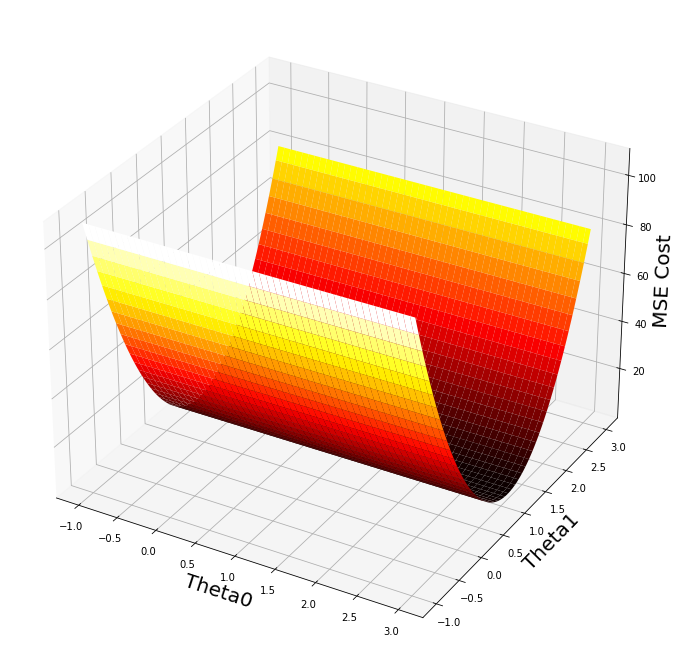

In [112]:
from matplotlib import cm
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(projection="3d")
ax.set_xlabel("Theta0", fontsize=20)
ax.set_ylabel("Theta1", fontsize=20)
ax.set_zlabel("MSE Cost", fontsize=20)
ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.hot)
plot_cost.min()
ij_min = np.unravel_index(plot_cost.argmin(),plot_cost.shape)
print(f"Min occurs at {ij_min}")

### Running Gradient Descent on our MSE Function

To Run Graident Descent, we need to calculate our gradients.Our MSE Function has two variables, theta0 and theta1,
we have to find partial derivatives in regards to those two values and return it

In [130]:
def gradient(x,y,params):
    n = y.size
    theta0_slope = (-2/n)* sum(y-params[0]-params[1]*x)
    theta1_slope = (-2/n)* sum((y-params[0]-params[1]*x)*x)
    return np.concatenate((theta0_slope,theta1_slope),axis=0)

### The Gradient Descent Algorithm


In [144]:
steps_multiplier = 0.01
params = np.array([2.9,2.9])
values_array = params.reshape(1,2)    #for plottting grad descent

for _ in range(1000):
    params = params - (steps_multiplier*gradient(x_5,y_5,params))
    values_array = np.append(values_array,values=params.reshape(1,2),axis=0)    #For plotting grad descent

    
print(f"Min for theta0 is {params[0]}, min for theta 1 is {params[1]}, mse is {mse(y_5,params[0]+params[1]*x_5)}")

Min for theta0 is 0.8532230461743415, min for theta 1 is 1.2214935332607393, mse is [0.94797511]


### Plotting The Gradient Descent On MSE

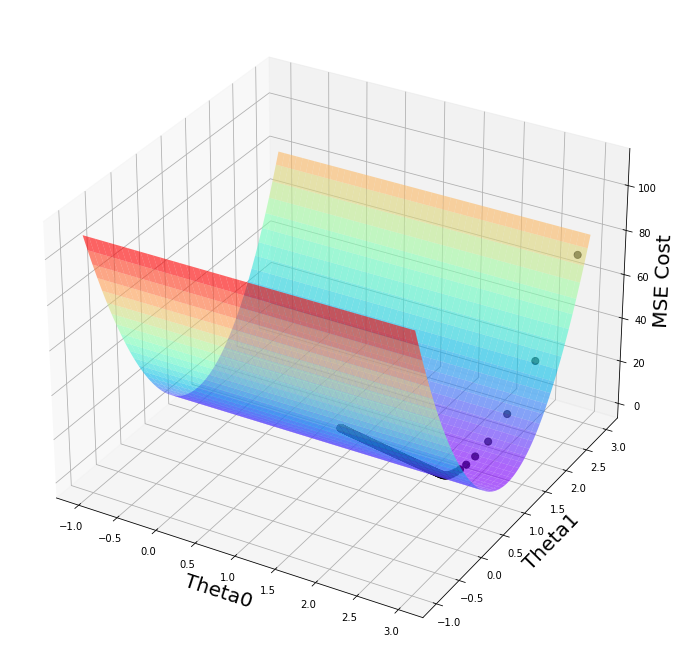

In [155]:
from matplotlib import cm
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(projection="3d")
ax.set_xlabel("Theta0", fontsize=20)
ax.set_ylabel("Theta1", fontsize=20)
ax.set_zlabel("MSE Cost", fontsize=20)
ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.rainbow,alpha=0.6)


#plot the grad descent
ax.scatter(values_array[:,0],values_array[:,1],mse(y_5,values_array[:,0]+values_array[:,1]*x_5),color="black",s=50)